In [1]:
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


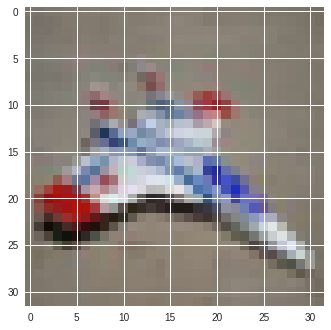

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[30])
plt.show()

In [0]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [0]:
inputs=Input(shape=(32,32,3))

c1=Conv2D(64,(3,3),padding="same",activation="relu")(inputs)
m1=MaxPooling2D(padding="same")(c1)

drop1=Dropout(0.3)(m1)

c2=Conv2D(64,(3,3),padding="same",activation="relu")(drop1)
m2=MaxPooling2D(padding="same")(c2)

drop2=Dropout(0.3)(m2)

c3=Conv2D(64,(5,5),padding="same",activation="relu")(drop2)
m3=MaxPooling2D(padding="same")(c3)


drop2=Dropout(0.3)(m3)

conv_out=Flatten()(drop2)

d1=Dense(512,activation="relu")(conv_out)

out=Dense(10,activation="softmax")(d1)

In [0]:
model=Model(inputs=inputs,outputs=out)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
__________

In [16]:
model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 318us/step - loss: 1.5603 - acc: 0.4272 - val_loss: 1.2462 - val_acc: 0.5547
Epoch 2/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.1712 - acc: 0.5801 - val_loss: 1.0366 - val_acc: 0.6311
Epoch 3/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.0281 - acc: 0.6340 - val_loss: 0.9461 - val_acc: 0.6705
Epoch 4/20
50000/50000 [==============================] - 15s 305us/step - loss: 0.9290 - acc: 0.6707 - val_loss: 0.8428 - val_acc: 0.7054
Epoch 5/20
50000/50000 [==============================] - 15s 304us/step - loss: 0.8674 - acc: 0.6918 - val_loss: 0.7747 - val_acc: 0.7302
Epoch 6/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.8078 - acc: 0.7157 - val_loss: 0.7728 - val_acc: 0.7319
Epoch 7/20
50000/50000 [==============================] - 15s 304us/step - loss: 0.7668 - acc: 0.7285 - val_loss: 0.

In [17]:
model.evaluate(x_train,y_train),model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 143us/step


([0.21593788519620896, 0.94122], [0.6667287351608276, 0.7749])